In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("data.csv")

In [90]:
#Checking for missing values 
df.isnull().sum()

Unnamed: 0             0
company_name           0
model_name             0
price                  0
model_year             0
location               0
mileage                0
engine_type            0
engine_capacity        0
color                  0
assembly               0
body_type              0
transmission_type      0
registration_status    0
dtype: int64

In [91]:
# Checking the structure of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   company_name         46022 non-null  object
 2   model_name           46022 non-null  object
 3   price                46022 non-null  int64 
 4   model_year           46022 non-null  int64 
 5   location             46022 non-null  object
 6   mileage              46022 non-null  int64 
 7   engine_type          46022 non-null  object
 8   engine_capacity      46022 non-null  int64 
 9   color                46022 non-null  object
 10  assembly             46022 non-null  object
 11  body_type            46022 non-null  object
 12  transmission_type    46022 non-null  object
 13  registration_status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [92]:
df.nunique()

Unnamed: 0             46022
company_name              31
model_name               196
price                   1419
model_year                30
location                   6
mileage                 5573
engine_type                3
engine_capacity           75
color                     24
assembly                   2
body_type                  6
transmission_type          2
registration_status        2
dtype: int64

In [93]:
"""From the result above the dataset contains columns with object datatypes which show that the columns are categorical, 
as machine learning only takes numerical data, data pre-preprocessing is required"""
df.head()

,Unnamed: 0,company_name,model_name,price,model_year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [94]:
from sklearn import preprocessing

In [95]:
categorical_columns = ['company_name', 'location', 'engine_type', 'color', 'assembly', 'body_type', 'transmission_type', 'registration_status']
label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
df.drop(columns = categorical_columns, inplace = True)
df.head()

,Unnamed: 0,model_name,price,model_year,mileage,engine_capacity,company_name_encoded,location_encoded,engine_type_encoded,color_encoded,assembly_encoded,body_type_encoded,transmission_type_encoded,registration_status_encoded
0,0,Vitz,2385000,2017,9869,1000,28,1,2,18,0,1,0,1
1,1,Corolla,111000,2019,11111,1300,28,2,2,21,1,4,0,0
2,2,Alto,1530000,2019,17500,660,27,2,2,21,1,1,0,1
3,3,Alto,1650000,2019,9600,660,27,4,2,21,1,1,1,0
4,4,Corolla,1435000,2010,120000,1300,28,1,2,2,1,4,1,0


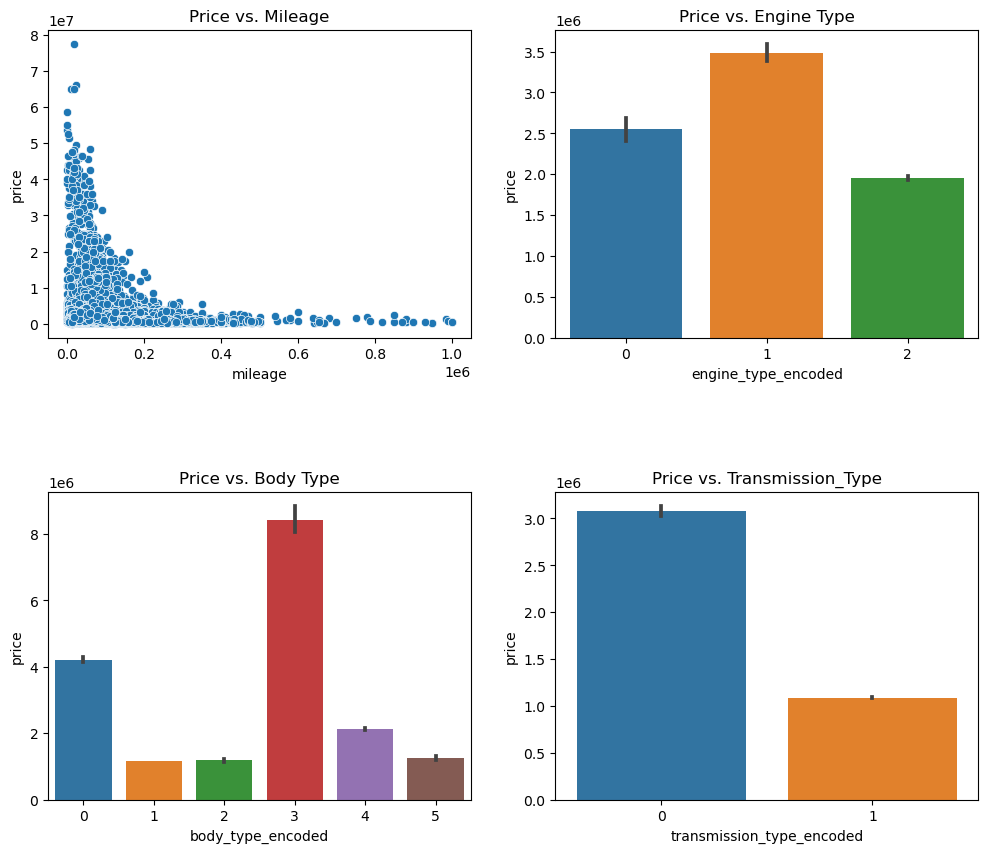

In [99]:
#Checking the relatinoship betweeen price and the target variables 
# Setting up the figure and axis for subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

# Plot 1: price vs. model_year
sns.scatterplot(x='mileage', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Mileage')

# Plot 2: Price vs. mileage 
sns.barplot(x='engine_type_encoded', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Engine Type')

# Plot 3: Price vs. Engine_Type
sns.barplot(x='body_type_encoded', y='price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price vs. Body Type')

# Plot 4: Price vs. Seating Capacity
sns.barplot(x='transmission_type_encoded', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Transmission_Type')

# Display the plots
plt.show()

In [102]:
#The data is ready, next step will be training of linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df.drop(columns = ["model_name", "price"])
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, predictions)
print(f"R Squared Error (RMSE): {r2}")
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (MSE): {rmse}')

Mean Squared Error (MSE): 3781307554377.9175
R Squared Error (RMSE): 0.5680624241087624
Root Mean Squared Error (MSE): 1944558.4471488425
